In [9]:
import os, json 
import pandas as pd
import numpy as np
import ffmpeg 
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [10]:
path_to_files = '/Users/yevheniyashevchenko/Documents/COVIDCoughCapstone/public_dataset/'
json_files = [loc_json for loc_json in os.listdir(path_to_files) if loc_json.endswith('.json')]
#print(json_files) shows all files end with .json 

In [11]:
output_list = []
for i,file in enumerate(json_files):
    data_dict = {}
    with open(path_to_files + file,"r") as json_open:
        data = json.loads(json_open.read())
        #print(data)
        for k,v in data.items(): 
            data_dict[k]= v
    output_list.append(data_dict)

In [12]:
df = pd.DataFrame(output_list)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27550 entries, 0 to 27549
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   datetime               27550 non-null  object
 1   cough_detected         27550 non-null  object
 2   latitude               16084 non-null  object
 3   longitude              16084 non-null  object
 4   age                    15218 non-null  object
 5   gender                 16224 non-null  object
 6   respiratory_condition  16224 non-null  object
 7   fever_muscle_pain      16224 non-null  object
 8   status                 16224 non-null  object
 9   expert_labels_1        820 non-null    object
 10  expert_labels_2        820 non-null    object
 11  expert_labels_3        820 non-null    object
 12  expert_labels_4        820 non-null    object
dtypes: object(13)
memory usage: 2.7+ MB


In [14]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

In [15]:
def from_coords_to_city_country(x):
    lat = x['latitude']
    long = x['longitude']
    if pd.isna(lat) or pd.isna(long):
        return np.nan, np.nan
    coord = f"{str(lat)}, {str(long)}"
    location = geolocator.reverse(coord, exactly_one=True)
    address = location.raw['address']
    city = address.get('city', np.nan)
    country = address.get('country', np.nan)
    print('.')
    return city, country

In [16]:
location_out = df[['latitude','longitude']].sample(10).apply(lambda x: from_coords_to_city_country(x), axis=1)

.
.
.
.
.
.
.


In [17]:
location_out

12399                           (Modesto, United States)
22059                                 (nan, Oʻzbekiston)
1001                                          (nan, nan)
6226               (nan, Schweiz/Suisse/Svizzera/Svizra)
23288                                         (nan, nan)
785                                           (nan, nan)
19034                                    (Palma, España)
16612              (nan, Schweiz/Suisse/Svizzera/Svizra)
23561                                 (nan, Oʻzbekiston)
16919    (Bodensee (SG), Schweiz/Suisse/Svizzera/Svizra)
dtype: object

In [18]:
df['longitude'] = df['longitude'].astype(float)
df['latitude'] = df['latitude'].astype(float)

## Participant Locations 

In [19]:
from shapely.geometry import Point 
import geopandas as gpd
from geopandas import GeoDataFrame

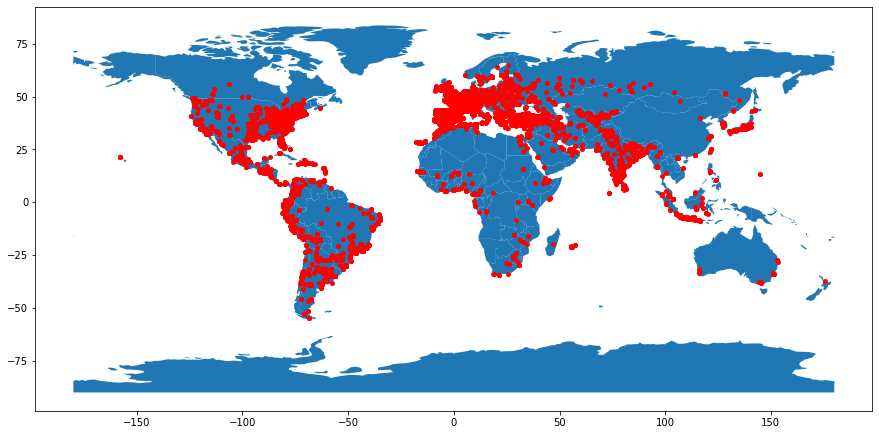

In [20]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry = geometry)
                   
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(15, 15)), marker='o', color='red', markersize=15);

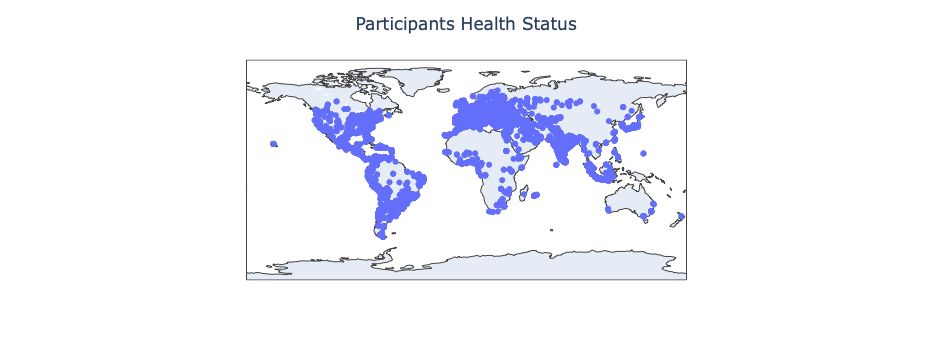

In [22]:
import plotly.express as px
import pandas as pd

fig = px.scatter_geo(df,lat='latitude',lon='longitude', hover_name="status")
fig.update_layout(title = 'Participants Health Status', title_x=0.5)
fig.show()